In [217]:
# Final EDA
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from numpy import percentile
from sklearn.impute import SimpleImputer

In [218]:
df=pd.read_csv('')

In [219]:
df.head()

,SUBJECT_ID,HADM_ID,DISEASE_DURATION,AGE,GENDER_M,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_LIFE PARTNER,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_WIDOWED,REL_DAY,BMI,Heart Rate,Flag_Heart_Rate_Alarm_Low,Flag_Heart_rate_Alarm_High,Oxygen_Saturation,Flag_Oxygen_Saturation_Alarm_High,Flag_Oxygen_Saturation_Alarm_Low,Arterial_Blood_Pressure_Systolic,Arterial_Blood_Pressure_Diastolic,Arterial_Blood_Pressure_Mean,GROUP_ID,DOD_LABEL
0,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.740484,75.407407,0.0,0.0,96.250000,1.0,1.0,103.678571,56.071429,74.769231,124112906.0,0.0
1,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,24.740484,79.040816,0.0,0.0,97.297872,1.0,1.0,105.979592,54.918367,75.812500,124112906.0,0.0
2,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,24.740484,74.714286,0.0,0.0,98.000000,1.0,1.0,110.428571,56.142857,87.857143,124112906.0,0.0
3,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,24.740484,76.857143,0.0,0.0,97.619048,1.0,1.0,120.285714,59.809524,81.285714,124112906.0,0.0
4,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,24.740484,79.450000,0.0,0.0,97.500000,1.0,1.0,107.700000,61.250000,79.800000,124112906.0,0.0


In [220]:
df.SUBJECT_ID.nunique()

1759

In [221]:
df.columns

Index(['SUBJECT_ID', 'HADM_ID', 'DISEASE_DURATION', 'AGE', 'GENDER_M',
       'MARITAL_STATUS_DIVORCED', 'MARITAL_STATUS_LIFE PARTNER',
       'MARITAL_STATUS_MARRIED', 'MARITAL_STATUS_SEPARATED',
       'MARITAL_STATUS_SINGLE', 'MARITAL_STATUS_UNKNOWN (DEFAULT)',
       'MARITAL_STATUS_WIDOWED', 'REL_DAY', 'BMI', 'Heart Rate',
       'Flag_Heart_Rate_Alarm_Low', 'Flag_Heart_rate_Alarm_High',
       'Oxygen_Saturation', 'Flag_Oxygen_Saturation_Alarm_High',
       'Flag_Oxygen_Saturation_Alarm_Low', 'Arterial_Blood_Pressure_Systolic',
       'Arterial_Blood_Pressure_Diastolic', 'Arterial_Blood_Pressure_Mean',
       'GROUP_ID', 'DOD_LABEL'],
      dtype='object')

In [222]:
df.isnull().mean()*100

SUBJECT_ID                           0.0
HADM_ID                              0.0
DISEASE_DURATION                     0.0
AGE                                  0.0
GENDER_M                             0.0
MARITAL_STATUS_DIVORCED              0.0
MARITAL_STATUS_LIFE PARTNER          0.0
MARITAL_STATUS_MARRIED               0.0
MARITAL_STATUS_SEPARATED             0.0
MARITAL_STATUS_SINGLE                0.0
MARITAL_STATUS_UNKNOWN (DEFAULT)     0.0
MARITAL_STATUS_WIDOWED               0.0
REL_DAY                              0.0
BMI                                  0.0
Heart Rate                           0.0
Flag_Heart_Rate_Alarm_Low            0.0
Flag_Heart_rate_Alarm_High           0.0
Oxygen_Saturation                    0.0
Flag_Oxygen_Saturation_Alarm_High    0.0
Flag_Oxygen_Saturation_Alarm_Low     0.0
Arterial_Blood_Pressure_Systolic     0.0
Arterial_Blood_Pressure_Diastolic    0.0
Arterial_Blood_Pressure_Mean         0.0
GROUP_ID                             0.0
DOD_LABEL       

In [223]:
df.BMI.max()

1497388.9619377162

In [224]:
df.BMI.min()

0.0

In [225]:
Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
Q1, Q3

(26.337006181134107, 39.63244585261338)

In [226]:
IQR = Q3 - Q1
IQR

13.295439671479272

In [227]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(6.393846673915199, 59.57560535983229)

In [228]:
df = df[(df.BMI>lower_limit)&(df.BMI<upper_limit)]

In [229]:
df.SUBJECT_ID.nunique()

1736

In [230]:
df['BMI'].describe()

count    16611.000000
mean        31.096803
std          7.706744
min         10.030864
25%         25.675740
50%         29.898830
75%         34.840237
max         59.541446
Name: BMI, dtype: float64

<AxesSubplot: xlabel='BMI', ylabel='Count'>

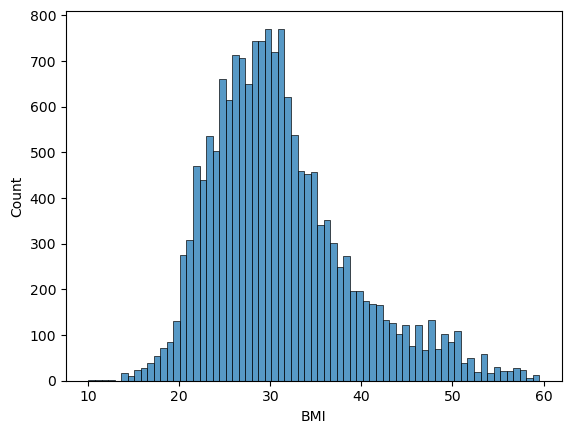

In [233]:
sns.histplot(data=df, x=df['BMI'])

In [235]:
df = df.rename(columns={'Heart Rate': 'Heart_Rate'})

In [236]:
df['Heart_Rate'].describe()

count    16611.000000
mean        85.896894
std         14.985109
min         32.846154
25%         75.240000
50%         84.750000
75%         95.550505
max        338.708333
Name: Heart_Rate, dtype: float64

<AxesSubplot: xlabel='Heart_Rate', ylabel='Count'>

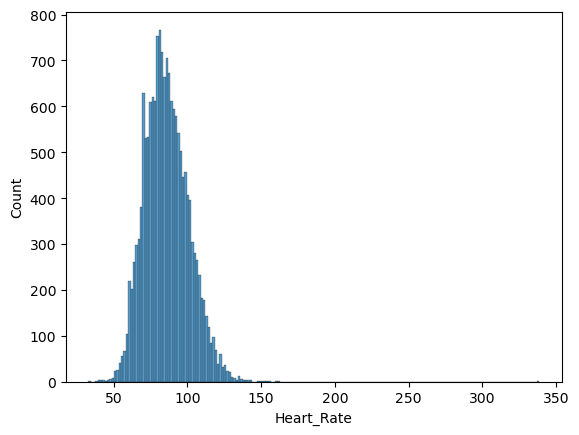

In [237]:
sns.histplot(data=df, x=df['Heart_Rate'])

In [239]:
Q1 = df.Heart_Rate.quantile(0.25)
Q3 = df.Heart_Rate.quantile(0.75)
Q1, Q3

(75.24, 95.55050505050505)

In [240]:
IQR = Q3 - Q1
IQR

20.310505050505057

In [241]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(44.77424242424241, 126.01626262626263)

In [242]:
df = df[(df.Heart_Rate>lower_limit)&(df.Heart_Rate<upper_limit)]

In [243]:
df.SUBJECT_ID.nunique()

1733

<AxesSubplot: xlabel='Heart_Rate', ylabel='Count'>

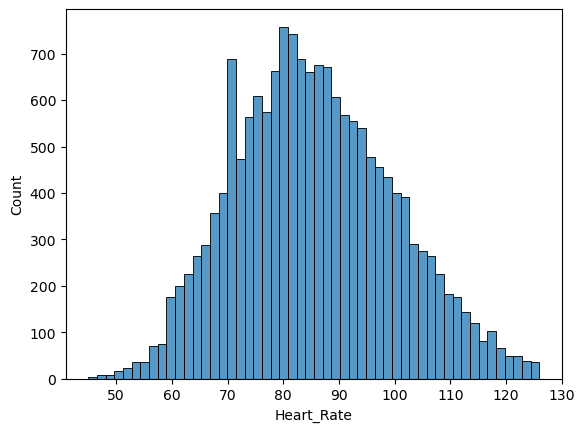

In [244]:
sns.histplot(data=df, x=df['Heart_Rate'])

<AxesSubplot: xlabel='Oxygen_Saturation', ylabel='Count'>

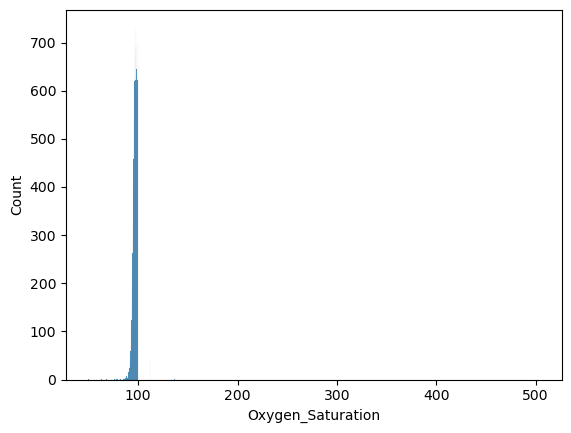

In [246]:
sns.histplot(data=df, x=df['Oxygen_Saturation'])

In [247]:
Q1 = df.Oxygen_Saturation.quantile(0.25)
Q3 = df.Oxygen_Saturation.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(91.48611111111111, 102.8564814814815)

In [248]:
df = df[(df.Oxygen_Saturation>lower_limit)&(df.Oxygen_Saturation<upper_limit)]

In [249]:
df.Oxygen_Saturation.describe()

count    16198.000000
mean        97.089388
std          1.862385
min         91.500000
25%         95.800000
50%         97.240000
75%         98.600000
max        100.000000
Name: Oxygen_Saturation, dtype: float64

<AxesSubplot: xlabel='Oxygen_Saturation', ylabel='Count'>

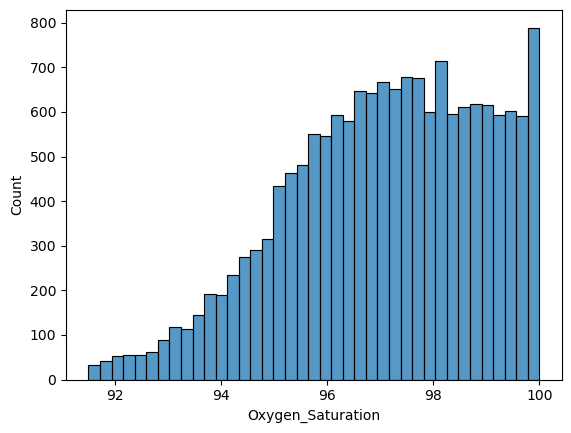

In [250]:
sns.histplot(data=df, x=df['Oxygen_Saturation'])

In [251]:
df.SUBJECT_ID.nunique()

1729

In [252]:
df.Arterial_Blood_Pressure_Systolic.describe()

count    16198.000000
mean       119.377978
std         18.697811
min          0.000000
25%        107.824544
50%        119.136146
75%        128.500000
max        210.142857
Name: Arterial_Blood_Pressure_Systolic, dtype: float64

<AxesSubplot: xlabel='Arterial_Blood_Pressure_Systolic', ylabel='Count'>

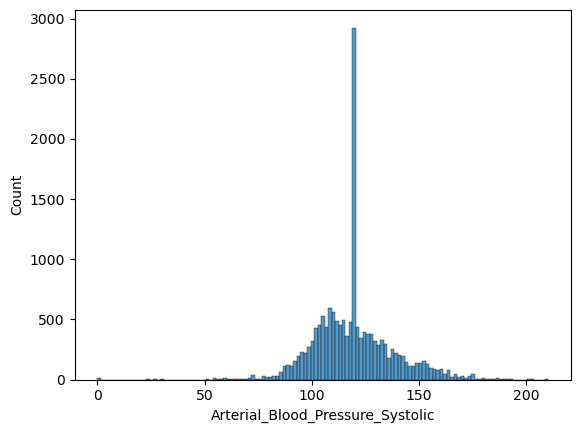

In [253]:
sns.histplot(data=df, x=df['Arterial_Blood_Pressure_Systolic'])

In [254]:
Q1 = df.Arterial_Blood_Pressure_Systolic.quantile(0.25)
Q3 = df.Arterial_Blood_Pressure_Systolic.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(76.81135902636919, 159.51318458417848)

In [255]:
df = df[(df.Arterial_Blood_Pressure_Systolic>lower_limit)&(df.Arterial_Blood_Pressure_Systolic<upper_limit)]

In [256]:
df.Arterial_Blood_Pressure_Systolic.describe()

count    15559.000000
mean       118.327799
std         15.636718
min         76.961538
25%        107.750000
50%        119.136146
75%        126.961310
max        159.500000
Name: Arterial_Blood_Pressure_Systolic, dtype: float64

<AxesSubplot: xlabel='Arterial_Blood_Pressure_Systolic', ylabel='Count'>

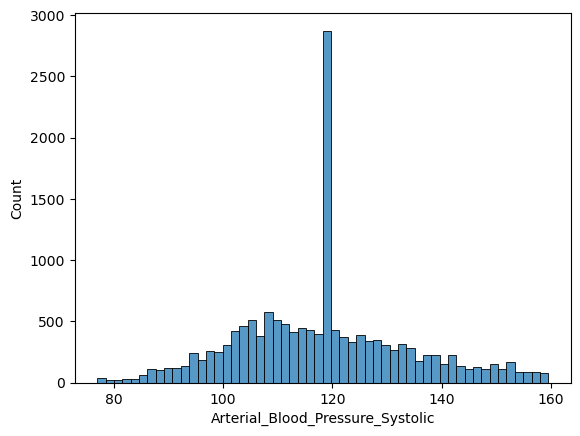

In [257]:
sns.histplot(data=df, x=df['Arterial_Blood_Pressure_Systolic'])

In [258]:
df.Arterial_Blood_Pressure_Diastolic.describe()

count    15559.000000
mean        60.162176
std         44.275918
min         18.857143
25%         52.333333
50%         60.000000
75%         63.500000
max       2960.572143
Name: Arterial_Blood_Pressure_Diastolic, dtype: float64

<AxesSubplot: xlabel='Arterial_Blood_Pressure_Diastolic', ylabel='Count'>

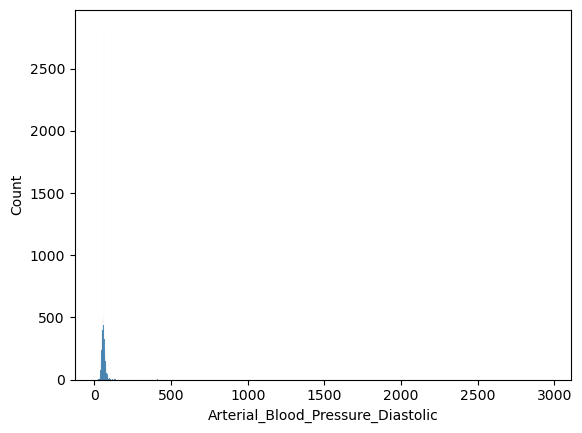

In [259]:
sns.histplot(data=df, x=df['Arterial_Blood_Pressure_Diastolic'])

In [260]:
Q1 = df.Arterial_Blood_Pressure_Diastolic.quantile(0.25)
Q3 = df.Arterial_Blood_Pressure_Diastolic.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(35.58333333333334, 80.25)

In [261]:
df = df[(df.Arterial_Blood_Pressure_Diastolic>lower_limit)&(df.Arterial_Blood_Pressure_Diastolic<upper_limit)]

In [262]:
df.Arterial_Blood_Pressure_Diastolic.describe()

count    14913.000000
mean        58.142919
std          8.587916
min         35.666667
25%         52.100000
50%         59.482759
75%         62.333333
max         80.192308
Name: Arterial_Blood_Pressure_Diastolic, dtype: float64

<AxesSubplot: xlabel='Arterial_Blood_Pressure_Diastolic', ylabel='Count'>

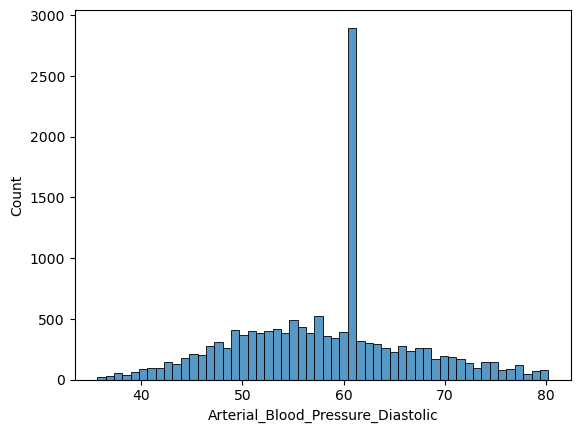

In [263]:
sns.histplot(data=df, x=df['Arterial_Blood_Pressure_Diastolic'])

In [265]:
df.columns

Index(['SUBJECT_ID', 'HADM_ID', 'DISEASE_DURATION', 'AGE', 'GENDER_M',
       'MARITAL_STATUS_DIVORCED', 'MARITAL_STATUS_LIFE PARTNER',
       'MARITAL_STATUS_MARRIED', 'MARITAL_STATUS_SEPARATED',
       'MARITAL_STATUS_SINGLE', 'MARITAL_STATUS_UNKNOWN (DEFAULT)',
       'MARITAL_STATUS_WIDOWED', 'REL_DAY', 'BMI', 'Heart_Rate',
       'Flag_Heart_Rate_Alarm_Low', 'Flag_Heart_rate_Alarm_High',
       'Oxygen_Saturation', 'Flag_Oxygen_Saturation_Alarm_High',
       'Flag_Oxygen_Saturation_Alarm_Low', 'Arterial_Blood_Pressure_Systolic',
       'Arterial_Blood_Pressure_Diastolic', 'Arterial_Blood_Pressure_Mean',
       'GROUP_ID', 'DOD_LABEL'],
      dtype='object')

In [266]:
df.Arterial_Blood_Pressure_Mean.describe()

count    14913.000000
mean        79.104967
std         19.179775
min        -40.000000
25%         71.454545
50%         79.678571
75%         84.000000
max        428.833333
Name: Arterial_Blood_Pressure_Mean, dtype: float64

In [267]:
Q1 = df.Arterial_Blood_Pressure_Mean.quantile(0.25)
Q3 = df.Arterial_Blood_Pressure_Mean.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(52.63636363636363, 102.81818181818181)

<AxesSubplot: xlabel='Arterial_Blood_Pressure_Mean', ylabel='Count'>

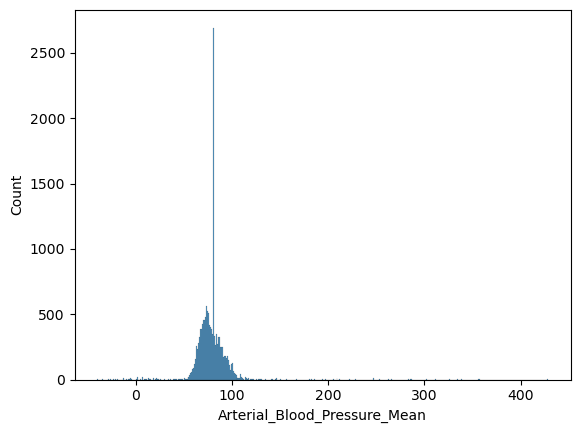

In [268]:
sns.histplot(data=df, x=df['Arterial_Blood_Pressure_Mean'])

In [269]:
df = df[(df.Arterial_Blood_Pressure_Mean>lower_limit)&(df.Arterial_Blood_Pressure_Mean<upper_limit)]

In [270]:
df.Arterial_Blood_Pressure_Mean.describe()

count    14344.000000
mean        78.360923
std          9.426353
min         52.666667
25%         71.571429
50%         79.375000
75%         83.272917
max        102.800000
Name: Arterial_Blood_Pressure_Mean, dtype: float64

<AxesSubplot: xlabel='Arterial_Blood_Pressure_Mean', ylabel='Count'>

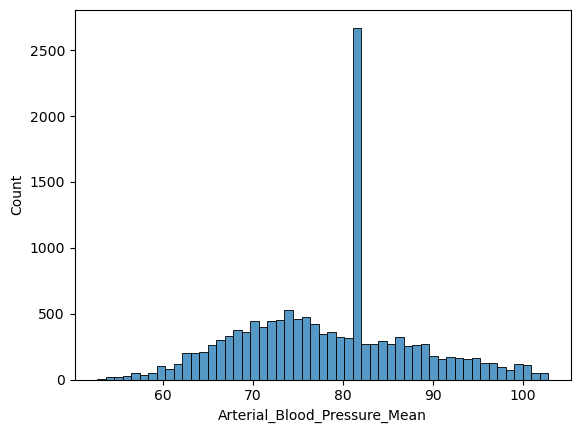

In [271]:
sns.histplot(data=df, x=df['Arterial_Blood_Pressure_Mean'])

<AxesSubplot: xlabel='DISEASE_DURATION', ylabel='Count'>

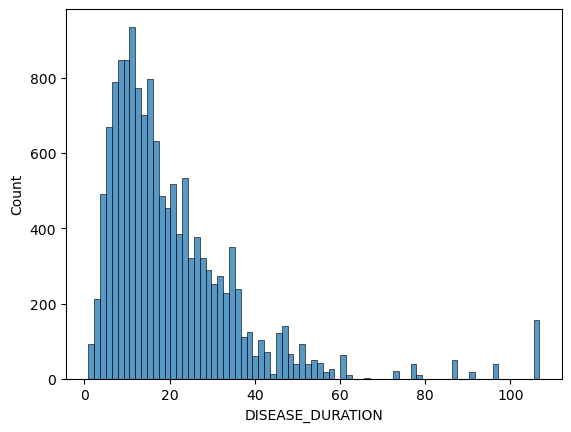

In [272]:
sns.histplot(data=df, x=df['DISEASE_DURATION'])

<AxesSubplot: xlabel='AGE', ylabel='Count'>

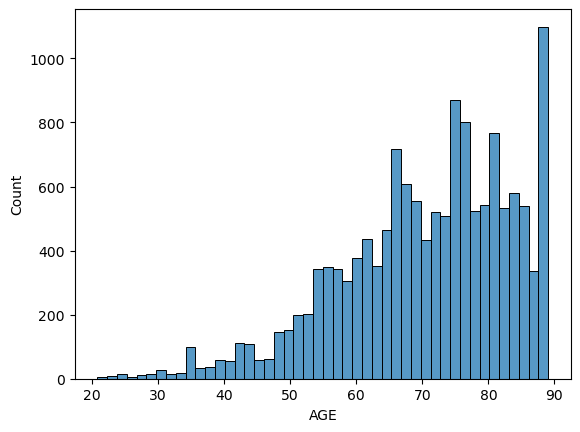

In [275]:
sns.histplot(data=df, x=df['AGE'])

In [276]:
df.AGE.describe()

count    14344.000000
mean        70.531106
std         12.931071
min         20.802740
25%         62.328767
50%         72.416438
75%         80.627397
max         89.060274
Name: AGE, dtype: float64

In [305]:
df.SUBJECT_ID.nunique()

1703

In [278]:
df2 = pd.read_csv('C:/Users/karti/PycharmProjects/Master_Thesis/ADMISSIONS.csv')
df2.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [279]:
new_df = pd.merge(df, df2,  how='left', left_on=['SUBJECT_ID','HADM_ID'], right_on = ['SUBJECT_ID','HADM_ID'])

In [281]:
new_df.head()

,SUBJECT_ID,HADM_ID,DISEASE_DURATION,AGE,GENDER_M,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_LIFE PARTNER,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_WIDOWED,REL_DAY,BMI,Heart_Rate,Flag_Heart_Rate_Alarm_Low,Flag_Heart_rate_Alarm_High,Oxygen_Saturation,Flag_Oxygen_Saturation_Alarm_High,Flag_Oxygen_Saturation_Alarm_Low,Arterial_Blood_Pressure_Systolic,Arterial_Blood_Pressure_Diastolic,Arterial_Blood_Pressure_Mean,GROUP_ID,DOD_LABEL,ROW_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.740484,75.407407,0.0,0.0,96.250000,1.0,1.0,103.678571,56.071429,74.769231,124112906.0,0.0,167,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2161-12-16 18:57:00,2161-12-17 12:35:00,"CHEST PAIN,R/O MI",0,1
1,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,24.740484,79.040816,0.0,0.0,97.297872,1.0,1.0,105.979592,54.918367,75.812500,124112906.0,0.0,167,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2161-12-16 18:57:00,2161-12-17 12:35:00,"CHEST PAIN,R/O MI",0,1
2,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,24.740484,74.714286,0.0,0.0,98.000000,1.0,1.0,110.428571,56.142857,87.857143,124112906.0,0.0,167,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2161-12-16 18:57:00,2161-12-17 12:35:00,"CHEST PAIN,R/O MI",0,1
3,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,24.740484,76.857143,0.0,0.0,97.619048,1.0,1.0,120.285714,59.809524,81.285714,124112906.0,0.0,167,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2161-12-16 18:57:00,2161-12-17 12:35:00,"CHEST PAIN,R/O MI",0,1
4,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,24.740484,79.450000,0.0,0.0,97.500000,1.0,1.0,107.700000,61.250000,79.800000,124112906.0,0.0,167,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2161-12-16 18:57:00,2161-12-17 12:35:00,"CHEST PAIN,R/O MI",0,1


In [284]:
new_df.MARITAL_STATUS.describe()

count       14135
unique          7
top       MARRIED
freq         7031
Name: MARITAL_STATUS, dtype: object

Text(0, 0.5, 'Count')

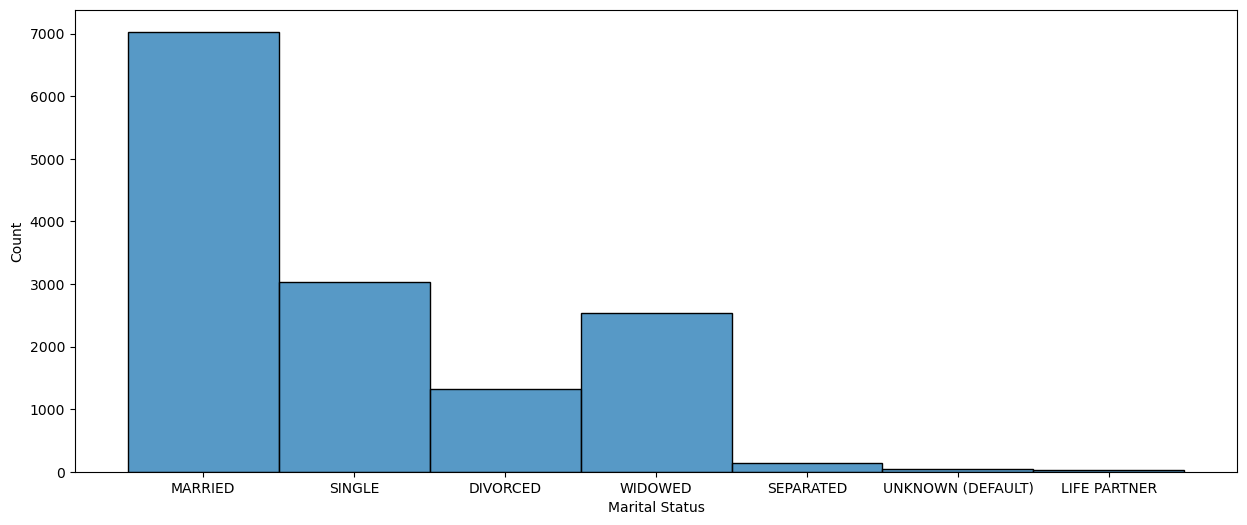

In [295]:
plt.figure(figsize=(15,6))
sns.histplot(x="MARITAL_STATUS", data=new_df)
plt.xlabel("Marital Status")
plt.ylabel("Count")

In [296]:
df3 = pd.read_csv('C:/Users/karti/PycharmProjects/Master_Thesis/PATIENTS.csv')
df3.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [297]:
new_df = pd.merge(new_df, df3,  how='left', left_on=['SUBJECT_ID'], right_on = ['SUBJECT_ID'])

In [299]:
new_df.columns

Index(['SUBJECT_ID', 'HADM_ID', 'DISEASE_DURATION', 'AGE', 'GENDER_M',
       'MARITAL_STATUS_DIVORCED', 'MARITAL_STATUS_LIFE PARTNER',
       'MARITAL_STATUS_MARRIED', 'MARITAL_STATUS_SEPARATED',
       'MARITAL_STATUS_SINGLE', 'MARITAL_STATUS_UNKNOWN (DEFAULT)',
       'MARITAL_STATUS_WIDOWED', 'REL_DAY', 'BMI', 'Heart_Rate',
       'Flag_Heart_Rate_Alarm_Low', 'Flag_Heart_rate_Alarm_High',
       'Oxygen_Saturation', 'Flag_Oxygen_Saturation_Alarm_High',
       'Flag_Oxygen_Saturation_Alarm_Low', 'Arterial_Blood_Pressure_Systolic',
       'Arterial_Blood_Pressure_Diastolic', 'Arterial_Blood_Pressure_Mean',
       'GROUP_ID', 'DOD_LABEL', 'ROW_ID_x', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', '

In [300]:
new_df.GENDER.describe()

count     14344
unique        2
top           M
freq       8137
Name: GENDER, dtype: object

In [301]:
new_df.head()

,SUBJECT_ID,HADM_ID,DISEASE_DURATION,AGE,GENDER_M,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_LIFE PARTNER,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_WIDOWED,REL_DAY,BMI,Heart_Rate,Flag_Heart_Rate_Alarm_Low,Flag_Heart_rate_Alarm_High,Oxygen_Saturation,Flag_Oxygen_Saturation_Alarm_High,Flag_Oxygen_Saturation_Alarm_Low,Arterial_Blood_Pressure_Systolic,Arterial_Blood_Pressure_Diastolic,Arterial_Blood_Pressure_Mean,GROUP_ID,DOD_LABEL,ROW_ID_x,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.740484,75.407407,0.0,0.0,96.250000,1.0,1.0,103.678571,56.071429,74.769231,124112906.0,0.0,167,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2161-12-16 18:57:00,2161-12-17 12:35:00,"CHEST PAIN,R/O MI",0,1,114,M,2090-11-19 00:00:00,2166-02-01 00:00:00,2166-02-01 00:00:00,2166-02-01 00:00:00,1
1,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,24.740484,79.040816,0.0,0.0,97.297872,1.0,1.0,105.979592,54.918367,75.812500,124112906.0,0.0,167,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2161-12-16 18:57:00,2161-12-17 12:35:00,"CHEST PAIN,R/O MI",0,1,114,M,2090-11-19 00:00:00,2166-02-01 00:00:00,2166-02-01 00:00:00,2166-02-01 00:00:00,1
2,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,24.740484,74.714286,0.0,0.0,98.000000,1.0,1.0,110.428571,56.142857,87.857143,124112906.0,0.0,167,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2161-12-16 18:57:00,2161-12-17 12:35:00,"CHEST PAIN,R/O MI",0,1,114,M,2090-11-19 00:00:00,2166-02-01 00:00:00,2166-02-01 00:00:00,2166-02-01 00:00:00,1
3,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,24.740484,76.857143,0.0,0.0,97.619048,1.0,1.0,120.285714,59.809524,81.285714,124112906.0,0.0,167,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2161-12-16 18:57:00,2161-12-17 12:35:00,"CHEST PAIN,R/O MI",0,1,114,M,2090-11-19 00:00:00,2166-02-01 00:00:00,2166-02-01 00:00:00,2166-02-01 00:00:00,1
4,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,24.740484,79.450000,0.0,0.0,97.500000,1.0,1.0,107.700000,61.250000,79.800000,124112906.0,0.0,167,2161-12-17 03:39:00,2161-12-24 15:35:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2161-12-16 18:57:00,2161-12-17 12:35:00,"CHEST PAIN,R/O MI",0,1,114,M,2090-11-19 00:00:00,2166-02-01 00:00:00,2166-02-01 00:00:00,2166-02-01 00:00:00,1


<AxesSubplot: xlabel='GENDER', ylabel='Count'>

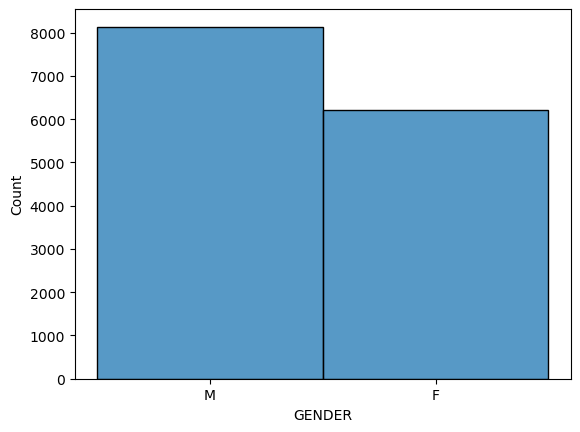

In [303]:
sns.histplot(data=new_df, x=new_df['GENDER'])

<AxesSubplot: xlabel='DOD_LABEL', ylabel='Count'>

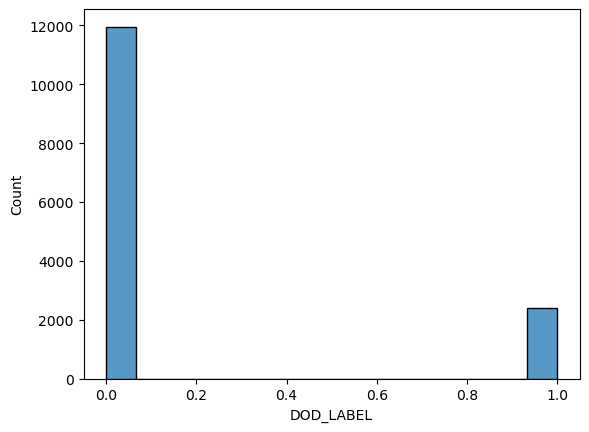

In [304]:
sns.histplot(data=new_df, x=new_df['DOD_LABEL'])

In [307]:
corr = df.corr()

In [308]:
df.head()

,SUBJECT_ID,HADM_ID,DISEASE_DURATION,AGE,GENDER_M,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_LIFE PARTNER,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_WIDOWED,REL_DAY,BMI,Heart_Rate,Flag_Heart_Rate_Alarm_Low,Flag_Heart_rate_Alarm_High,Oxygen_Saturation,Flag_Oxygen_Saturation_Alarm_High,Flag_Oxygen_Saturation_Alarm_Low,Arterial_Blood_Pressure_Systolic,Arterial_Blood_Pressure_Diastolic,Arterial_Blood_Pressure_Mean,GROUP_ID,DOD_LABEL
0,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.740484,75.407407,0.0,0.0,96.250000,1.0,1.0,103.678571,56.071429,74.769231,124112906.0,0.0
1,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,24.740484,79.040816,0.0,0.0,97.297872,1.0,1.0,105.979592,54.918367,75.812500,124112906.0,0.0
2,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,24.740484,74.714286,0.0,0.0,98.000000,1.0,1.0,110.428571,56.142857,87.857143,124112906.0,0.0
3,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,24.740484,76.857143,0.0,0.0,97.619048,1.0,1.0,120.285714,59.809524,81.285714,124112906.0,0.0
4,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,24.740484,79.450000,0.0,0.0,97.500000,1.0,1.0,107.700000,61.250000,79.800000,124112906.0,0.0


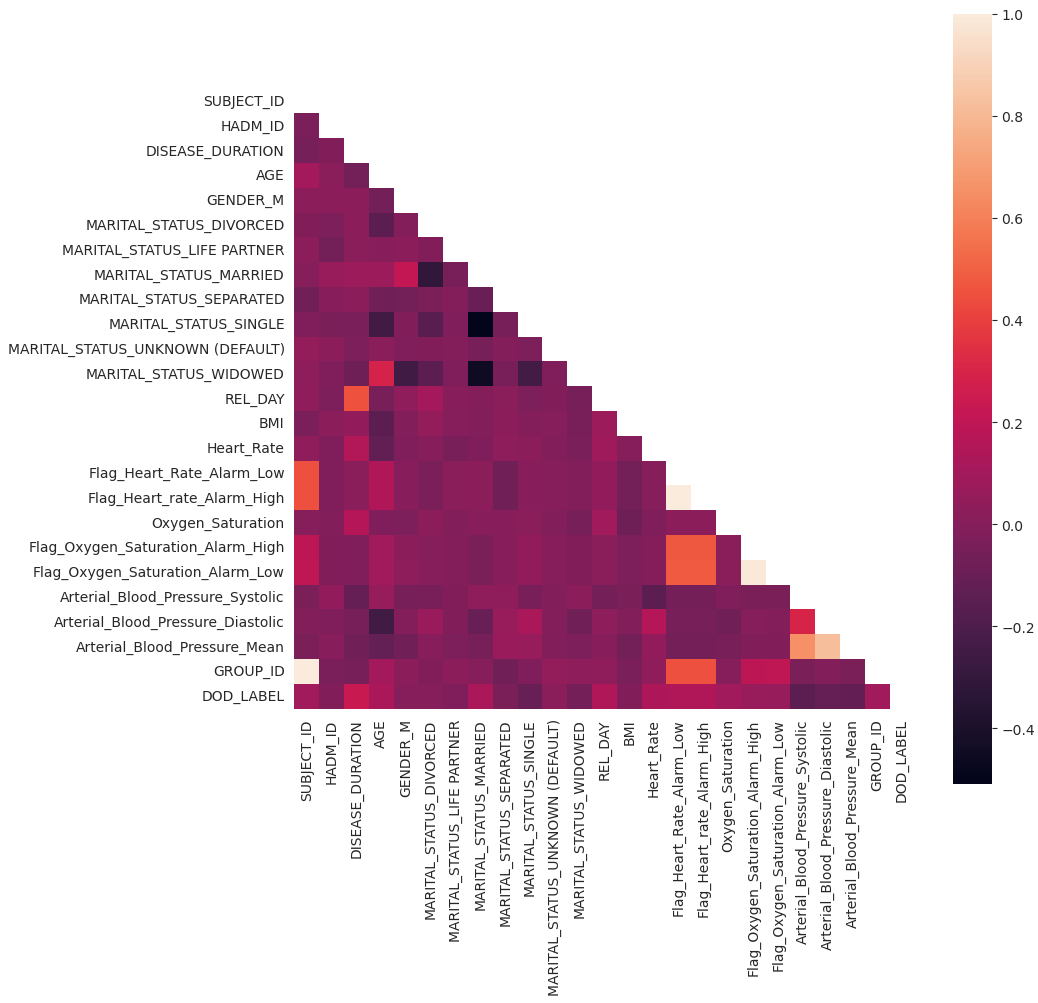

In [309]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

In [310]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_file(output_file="C:/Users/karti/PycharmProjects/Master_Thesis/Final_EDA/output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [311]:
df.head()

,SUBJECT_ID,HADM_ID,DISEASE_DURATION,AGE,GENDER_M,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_LIFE PARTNER,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_WIDOWED,REL_DAY,BMI,Heart_Rate,Flag_Heart_Rate_Alarm_Low,Flag_Heart_rate_Alarm_High,Oxygen_Saturation,Flag_Oxygen_Saturation_Alarm_High,Flag_Oxygen_Saturation_Alarm_Low,Arterial_Blood_Pressure_Systolic,Arterial_Blood_Pressure_Diastolic,Arterial_Blood_Pressure_Mean,GROUP_ID,DOD_LABEL
0,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.740484,75.407407,0.0,0.0,96.250000,1.0,1.0,103.678571,56.071429,74.769231,124112906.0,0.0
1,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,24.740484,79.040816,0.0,0.0,97.297872,1.0,1.0,105.979592,54.918367,75.812500,124112906.0,0.0
2,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,24.740484,74.714286,0.0,0.0,98.000000,1.0,1.0,110.428571,56.142857,87.857143,124112906.0,0.0
3,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,24.740484,76.857143,0.0,0.0,97.619048,1.0,1.0,120.285714,59.809524,81.285714,124112906.0,0.0
4,124.0,112906.0,7.497222,71.123288,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,24.740484,79.450000,0.0,0.0,97.500000,1.0,1.0,107.700000,61.250000,79.800000,124112906.0,0.0


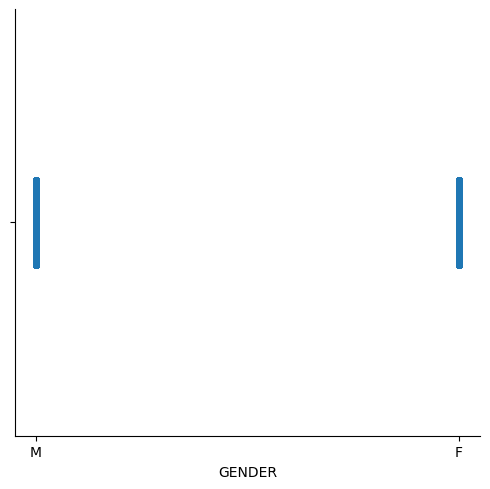

In [312]:
sns.catplot(data=new_df, x="GENDER")

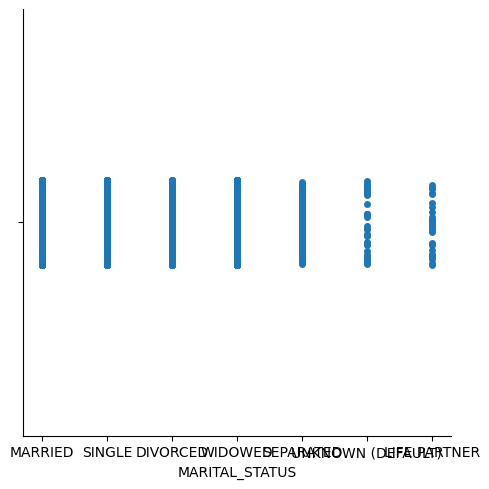

In [313]:
sns.catplot(data=new_df, x="MARITAL_STATUS")